<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score

In [ ]:
col_names = ['pregnant', 'glucose', 'bp','skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
path = 'drive/MyDrive/'
pima = pd.read_csv(path + 'diabetes.csv')
pima = pima.set_axis(col_names, axis = 1)
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin','insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols]
y = pima.label
X.shape

(768, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
# En random forest no es necesario hacer estandarización.

In [ ]:
print(X_train)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
170         6      102  82     0        0  30.8     0.180   36
166         3      148  66    25        0  32.5     0.256   22
25         10      125  70    26      115  31.1     0.205   41
13          1      189  60    23      846  30.1     0.398   59
55          1       73  50    10        0  23.0     0.248   21
..        ...      ...  ..   ...      ...   ...       ...  ...
360         5      189  64    33      325  31.2     0.583   29
709         2       93  64    32      160  38.0     0.674   23
439         6      107  88     0        0  36.8     0.727   31
174         2       75  64    24       55  29.7     0.370   33
122         2      107  74    30      100  33.6     0.404   23

[576 rows x 8 columns]


In [ ]:
RF_model = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt' ) #Estimadores = numero de arboles,
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Accuracy en entrenamiento: {:.2f}'.format(RF_model.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(RF_model.score(X_test, y_test)))

Accuracy en entrenamiento: 1.00
Accuracy en test: 0.76


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99 27]
 [20 46]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       126
           1       0.63      0.70      0.66        66

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



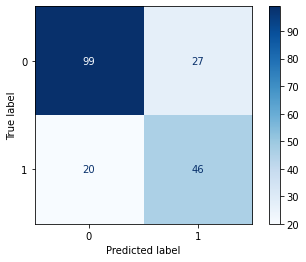

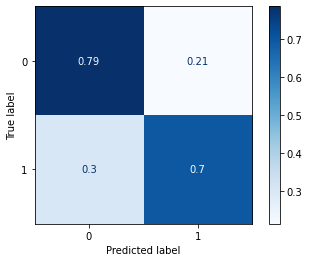

In [ ]:
plot_confusion_matrix(RF_model, X_test, y_test, cmap = plt.cm.Blues);
plot_confusion_matrix(RF_model, X_test, y_test, cmap = plt.cm.Blues, normalize = 'true');

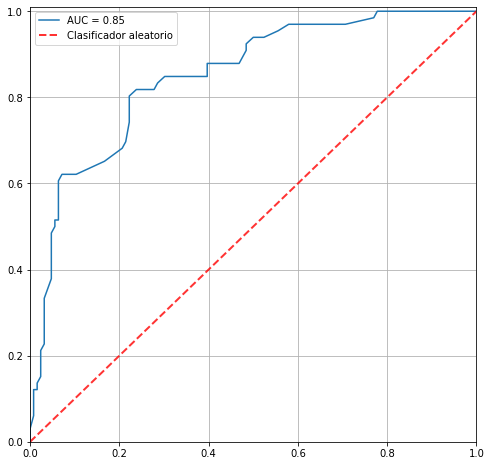

In [ ]:
plt.figure(figsize = (8,8))
y_pred_proba = RF_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "AUC = {:.2f}".format(auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2, color = 'r', alpha = 0.8, label = 'Clasificador aleatorio')
plt.grid()
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()

Text(0, 0.5, 'Pedigree Function')

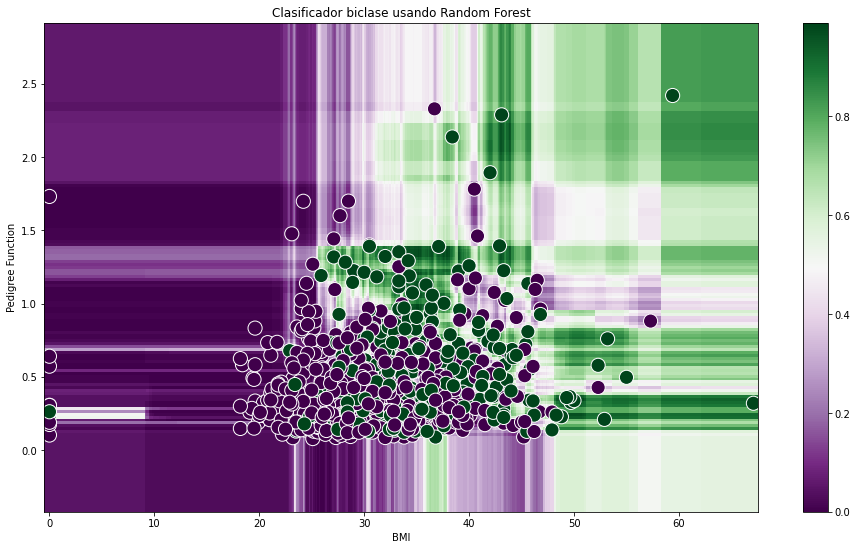

In [ ]:
#Ilustrar un comportamiento general dado que se estan usando todos los datos.
X = pima[feature_cols].values
y = pima.label
h = 0.02 #Pasos

clf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')
clf.fit(X[:,[5,6]],y) #Tomamos la característica de la pedigree y bmi. 
x_min, x_max = X[:,5].min() - 0.5, X[:,5].max() + 0.5 #Puntos para la gráfica. Eje x
y_min, y_max = X[:,6].min() - 0.5, X[:,6].max() + 0.5 #Puntos para la gráfica. Eje y
#Combinar valores de x,y , con numpy se genera la grilla.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Predecir cada punto de los creados anteriormente. Tomar la probabilidad de que la persona esté enferma.
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

#Realizar gráfica.
plt.figure(figsize = (16,9))
plt.pcolormesh(xx,yy,Z,cmap = 'PRGn')

plt.colorbar();
plt.scatter(X[:,5],X[:,6], c = y, cmap = plt.cm.PRGn, edgecolor = 'w', s = 200)
plt.xlim([xx.min(), xx.max()])
plt.ylim([yy.min(), yy.max()])

plt.title('Clasificador biclase usando Random Forest')
plt.xlabel('BMI')
plt.ylabel('Pedigree Function')

Random Forest nos interesa para conocer cuales son las características más relevantes y sus proporciones.

[0.08859623 0.21704077 0.09563645 0.07424395 0.07317408 0.16485791
 0.12513702 0.16131359]
[4 3 0 2 6 7 5 1]


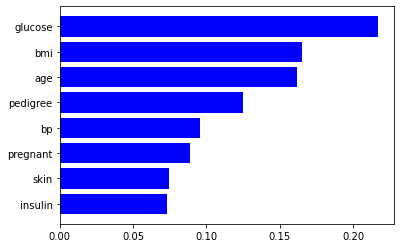

In [ ]:
importances = RF_model.feature_importances_
print(importances)
indices = np.argsort(importances)
print(indices)
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),[feature_cols[i] for i in indices]);

Variabilidad al menos del 90 - 95%, así que se podría eliminar una característica.